In [20]:
import numpy as np
from tqdm import tqdm
from MVN import MultivariateNormal

In [21]:
true_cov = [[1.44, -.702], [-.702, .81]]
n = MultivariateNormal([4, 2], true_cov)

In [22]:
def mh_sample(posterior, theta, sigma, n_samples, every, burnin):

    shape_small = (n_samples,) + theta.shape
    shape_large = (n_samples*every + burnin,) + theta.shape
    samples = np.zeros(shape_small)
    proposals = np.random.normal(loc=0, scale=sigma, size=shape_large)
    uniforms = np.random.uniform(low=0, high=1, size=shape_large[0])
    old_posterior = posterior(theta)
    for i in tqdm(range(shape_large[0])):
        theta_new = theta + proposals[i]
        new_posterior = posterior(theta_new)
        if uniforms[i] < new_posterior / old_posterior:
            theta = theta_new
            old_posterior = new_posterior
        if i > burnin and i % every == 0:
            samples[(i - burnin)//every] = theta
    return(samples)

In [23]:
x = mh_sample(n.pdf, np.array([3, 4]), 1, int(1e8), 1, 100)

100%|██████████| 100000100/100000100 [34:06<00:00, 48858.13it/s]


In [24]:
def mean(samples):
    return np.average(samples, axis=0)
def cov(samples):
    deviation = samples - mean(samples)[np.newaxis, :]
    cov = np.sum(deviation[:, :, np.newaxis] *
                deviation[:, np.newaxis, :], axis=0)
    n = deviation.shape[0]
    return (cov / (n - 1))

In [25]:
print(mean(x))

[4.00034476 2.00000735]


In [26]:
print(cov(x)-true_cov)

[[ 0.0002081   0.0002388 ]
 [ 0.0002388  -0.00022965]]


In [27]:
diffs = []
Ns = np.logspace(1, 8, num=200, dtype=int)
for N in Ns:
    x_sect = x[:N]
    diffs.append(cov(x_sect) - true_cov)
diffs = np.array(diffs)

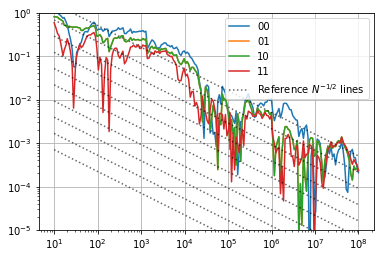

In [61]:
for i in range(2):
    for j in range(2):
        plt.loglog(Ns, abs(diffs[:, i, j]), label=f'{i}{j}')

min_error = abs(diffs).min()
max_error = abs(diffs).max()

leg = 'Reference $N^{-1/2}$ lines'
for C in np.geomspace(max_error * np.sqrt(Ns[0]), min_error * np.sqrt(Ns[-1]), num=10):
    plt.loglog(Ns, Ns**(-1/2) * C, ls=':', c='black', alpha=.6, label=leg)
    leg=None
plt.grid('on')
plt.ylim(1e-5, 1e0)
plt.legend()

In [40]:
np.save('hundred_million_samples', x)

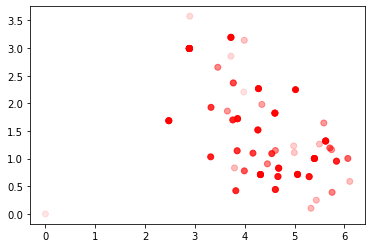

In [59]:
m = 100
xs = x[:m,0]
ys = x[:m,1]
a = np.linspace(0.1, 1, num=m)
rgba_colors = np.zeros((m,4))
rgba_colors[:,0] = 1
rgba_colors[:,3] = a

plt.scatter(xs, ys, color=rgba_colors)

In [60]:
x[0]

array([0., 0.])